In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
data=pd.read_csv("data80_detailed.csv")
data.shape

(61050, 81)

In [ ]:
X = data.drop('CVD', axis=1)
y = data['CVD']

In [ ]:
min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X)
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X_normalized)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Model fitting
##Models fitted: Random Forest, LR with weights adjusted, SVM, GB

##Using PCE + Occupation Features

###Random Forest

In [ ]:
class_weights = y.value_counts().to_dict()
weights = [5,7,9,11,13]
for i in range(5):
  class_weights[1.0] = weights[i]
  class_weights[0.0] = 1
  print(class_weights)
  rf = RandomForestClassifier(n_estimators=10, random_state=42,class_weight=class_weights)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  cm=confusion_matrix(y_test, y_pred)
  print(f'Accuracy: {accuracy}')
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  f1 = f1_score(y_test, y_pred)
  print(tn, fp, fn, tp, f1)

{0.0: 1, 1.0: 5}
Accuracy: 0.9025389025389026
27137 270 2705 413 0.21731123388581952
{0.0: 1, 1.0: 7}
Accuracy: 0.9024733824733825
27165 242 2735 383 0.20464867753139193
{0.0: 1, 1.0: 9}
Accuracy: 0.9008353808353808
27134 273 2754 364 0.19387483355525967
{0.0: 1, 1.0: 11}
Accuracy: 0.9013595413595413
27125 282 2729 389 0.20533122195830034
{0.0: 1, 1.0: 13}
Accuracy: 0.9024406224406224
27191 216 2762 356 0.19295392953929538


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Find the class weights based on the inverse of their frequencies
class_weights = y.value_counts().to_dict()
weights = [5,7,9,11,13000]

for i in range(5):
  # Initialize the KFold cross-validator with 10 folds
  kf = KFold(n_splits=2, shuffle=True)

  total_training_accuracy = 0
  total_testing_accuracy = 0
  total_precision = 0
  total_recall = 0
  total_f1 = 0
  fold = 1

  class_weights[1.0] = weights[i]
  class_weights[0.0] = 1
  clf = RandomForestClassifier(n_estimators=5, random_state=42, class_weight=class_weights)
  #clf = svm.SVC(class_weight=class_weights)

  for train_index, test_index in kf.split(X_standardized):
      X_train, X_test = X_standardized[train_index], X_standardized[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      # Train the model on the training data
      clf.fit(X_train, y_train)

      # Compute the training accuracy
      training_accuracy = clf.score(X_train, y_train)

      # Make predictions using the test data
      y_test_pred = clf.predict(X_test)

      # Compute the testing accuracy, precision, recall, and F1 score
      testing_accuracy = clf.score(X_test, y_test)
      precision = precision_score(y_test, y_test_pred)
      recall = recall_score(y_test, y_test_pred)
      f1 = f1_score(y_test, y_test_pred)

      # print(f"Fold {fold}:")
      # print(f"  Training accuracy: {training_accuracy * 100:.2f}%")
      # print(f"  Testing accuracy: {testing_accuracy * 100:.2f}%")
      # print(f"  Precision: {precision:.2f}")
      # print(f"  Recall: {recall:.2f}")
      # print(f"  F1 score: {f1:.2f}")
      # print()

      total_training_accuracy += training_accuracy
      total_testing_accuracy += testing_accuracy
      total_precision += precision
      total_recall += recall
      total_f1 += f1
      fold += 1

  # Calculate the average training accuracy, testing accuracy, precision, recall, and F1 score
  average_training_accuracy = total_training_accuracy / (fold - 1)
  average_testing_accuracy = total_testing_accuracy / (fold - 1)
  average_precision = total_precision / (fold - 1)
  average_recall = total_recall / (fold - 1)
  average_f1 = total_f1 / (fold - 1)

  print(f"Average training accuracy: {average_training_accuracy * 100:.2f}%")
  print(f"Average testing accuracy: {average_testing_accuracy * 100:.2f}%")
  print(f"Average precision: {average_precision:.2f}")
  print(f"Average recall: {average_recall:.2f}")
  print(f"Average F1 score: {average_f1:.2f}")
  print()


Average training accuracy: 98.40%
Average testing accuracy: 89.39%
Average precision: 0.45
Average recall: 0.19
Average F1 score: 0.27

Average training accuracy: 98.46%
Average testing accuracy: 89.47%
Average precision: 0.46
Average recall: 0.20
Average F1 score: 0.28

Average training accuracy: 98.40%
Average testing accuracy: 89.57%
Average precision: 0.47
Average recall: 0.19
Average F1 score: 0.27

Average training accuracy: 98.42%
Average testing accuracy: 89.58%
Average precision: 0.47
Average recall: 0.19
Average F1 score: 0.27

Average training accuracy: 98.45%
Average testing accuracy: 89.63%
Average precision: 0.47
Average recall: 0.18
Average F1 score: 0.26



###Logistic Regression

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Find the class weights based on the inverse of their frequencies
class_weights = y.value_counts().to_dict()
weights = [1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9]

for i in range(10):
  # Initialize the KFold cross-validator with 10 folds
  kf = KFold(n_splits=10)

  total_training_accuracy = 0
  total_testing_accuracy = 0
  total_precision = 0
  total_recall = 0
  total_f1 = 0
  fold = 1

  class_weights[1.0] = weights[i]
  class_weights[0.0] = 1
  # for key in class_weights:
  #     class_weights[key] = 1 / class_weights[key]
  #     print(f"weight: class {key}: {class_weights[key]}")

  # Initialize the Logistic Regression model with class weights and max_iter=1000
  lr = LogisticRegression(max_iter=1000, class_weight=class_weights)

  for train_index, test_index in kf.split(X_standardized):
      X_train, X_test = X_standardized[train_index], X_standardized[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      # Train the model on the training data
      lr.fit(X_train, y_train)

      # Compute the training accuracy
      training_accuracy = lr.score(X_train, y_train)

      # Make predictions using the test data
      y_test_pred = lr.predict(X_test)

      # Compute the testing accuracy, precision, recall, and F1 score
      testing_accuracy = lr.score(X_test, y_test)
      precision = precision_score(y_test, y_test_pred)
      recall = recall_score(y_test, y_test_pred)
      f1 = f1_score(y_test, y_test_pred)

      # print(f"Fold {fold}:")
      # print(f"  Training accuracy: {training_accuracy * 100:.2f}%")
      # print(f"  Testing accuracy: {testing_accuracy * 100:.2f}%")
      # print(f"  Precision: {precision:.2f}")
      # print(f"  Recall: {recall:.2f}")
      # print(f"  F1 score: {f1:.2f}")
      # print()

      total_training_accuracy += training_accuracy
      total_testing_accuracy += testing_accuracy
      total_precision += precision
      total_recall += recall
      total_f1 += f1
      fold += 1

  # Calculate the average training accuracy, testing accuracy, precision, recall, and F1 score
  average_training_accuracy = total_training_accuracy / (fold - 1)
  average_testing_accuracy = total_testing_accuracy / (fold - 1)
  average_precision = total_precision / (fold - 1)
  average_recall = total_recall / (fold - 1)
  average_f1 = total_f1 / (fold - 1)

  print(f"Average training accuracy: {average_training_accuracy * 100:.2f}%")
  print(f"Average testing accuracy: {average_testing_accuracy * 100:.2f}%")
  print(f"Average precision: {average_precision:.2f}")
  print(f"Average recall: {average_recall:.2f}")
  print(f"Average F1 score: {average_f1:.2f}")
  print()


Average training accuracy: 89.91%
Average testing accuracy: 89.87%
Average precision: 0.52
Average recall: 0.08
Average F1 score: 0.13

Average training accuracy: 89.41%
Average testing accuracy: 89.37%
Average precision: 0.45
Average recall: 0.20
Average F1 score: 0.28

Average training accuracy: 88.33%
Average testing accuracy: 88.33%
Average precision: 0.41
Average recall: 0.32
Average F1 score: 0.36

Average training accuracy: 85.67%
Average testing accuracy: 85.66%
Average precision: 0.35
Average recall: 0.48
Average F1 score: 0.41

Average training accuracy: 83.27%
Average testing accuracy: 83.25%
Average precision: 0.32
Average recall: 0.60
Average F1 score: 0.42

Average training accuracy: 80.97%
Average testing accuracy: 80.96%
Average precision: 0.30
Average recall: 0.67
Average F1 score: 0.42

Average training accuracy: 78.89%
Average testing accuracy: 78.86%
Average precision: 0.29
Average recall: 0.72
Average F1 score: 0.41

Average training accuracy: 77.07%
Average testin

###SVM

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Find the class weights based on the inverse of their frequencies
class_weights = y.value_counts().to_dict()
weights = [5, 6, 7, 8, 9]

for i in range(5):
  # Initialize the KFold cross-validator with 10 folds
  kf = KFold(n_splits=2, shuffle=True)

  total_training_accuracy = 0
  total_testing_accuracy = 0
  total_precision = 0
  total_recall = 0
  total_f1 = 0
  fold = 1

  class_weights[1.0] = weights[i]
  class_weights[0.0] = 1

  clf = svm.SVC(class_weight=class_weights)

  for train_index, test_index in kf.split(X_standardized):
      X_train, X_test = X_standardized[train_index], X_standardized[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      # Train the model on the training data
      clf.fit(X_train, y_train)

      # Compute the training accuracy
      training_accuracy = clf.score(X_train, y_train)

      # Make predictions using the test data
      y_test_pred = clf.predict(X_test)

      # Compute the testing accuracy, precision, recall, and F1 score
      testing_accuracy = clf.score(X_test, y_test)
      precision = precision_score(y_test, y_test_pred)
      recall = recall_score(y_test, y_test_pred)
      f1 = f1_score(y_test, y_test_pred)

      # print(f"Fold {fold}:")
      # print(f"  Training accuracy: {training_accuracy * 100:.2f}%")
      # print(f"  Testing accuracy: {testing_accuracy * 100:.2f}%")
      # print(f"  Precision: {precision:.2f}")
      # print(f"  Recall: {recall:.2f}")
      # print(f"  F1 score: {f1:.2f}")
      # print()

      total_training_accuracy += training_accuracy
      total_testing_accuracy += testing_accuracy
      total_precision += precision
      total_recall += recall
      total_f1 += f1
      fold += 1

  # Calculate the average training accuracy, testing accuracy, precision, recall, and F1 score
  average_training_accuracy = total_training_accuracy / (fold - 1)
  average_testing_accuracy = total_testing_accuracy / (fold - 1)
  average_precision = total_precision / (fold - 1)
  average_recall = total_recall / (fold - 1)
  average_f1 = total_f1 / (fold - 1)

  print(f"Average training accuracy: {average_training_accuracy * 100:.2f}%")
  print(f"Average testing accuracy: {average_testing_accuracy * 100:.2f}%")
  print(f"Average precision: {average_precision:.2f}")
  print(f"Average recall: {average_recall:.2f}")
  print(f"Average F1 score: {average_f1:.2f}")
  print()


###Neural Networks

####Finding best model architecture

In [ ]:
# build a model
model = Sequential()
model.add(Dense(20, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='Adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy',
                                   mode='max', # don't minimize the accuracy!
                                   patience=5,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=30, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.3,
                    shuffle=True,
                    verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                1980      
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,201
Trainable params: 2,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1128/1128 [==============================] - 4s 3ms/step - loss: 0.4823 - accuracy: 0.7751 - val_loss: 0.4190 - val_accuracy: 0.8055
Epoch 2/30
1128/1128 [==============================] - 4s 4ms/step - loss: 0.3930 - accuracy: 0.8170 - val_loss: 0.4012 - val_accuracy: 0.8104
Epoch 3/30
1128/1128 [======

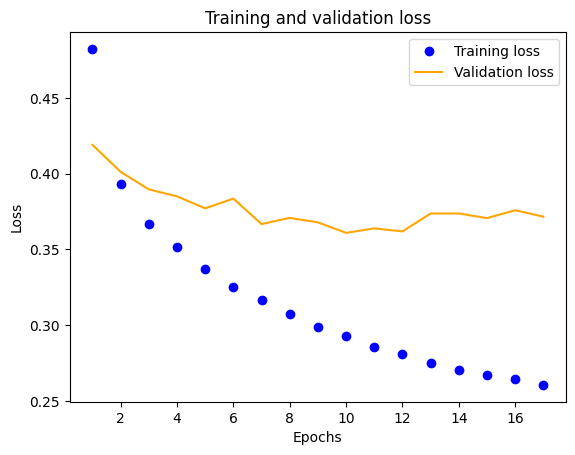

In [ ]:
history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

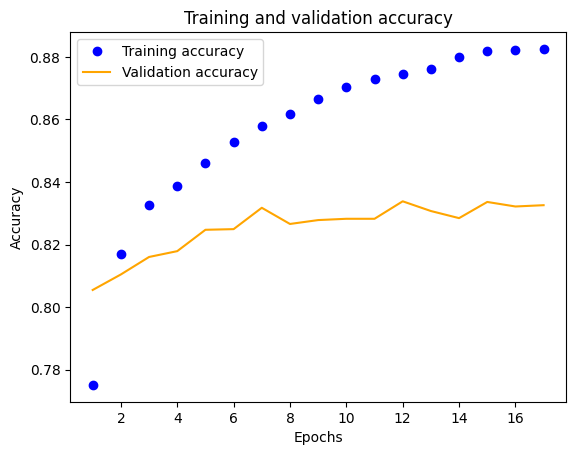

0.8338162302970886

In [ ]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = np.round(model.predict(X_test),0)

# confusion matrix
print(confusion_matrix(y_test, preds)) # order matters! (actual, predicted)

print(classification_report(y_test, preds))

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
(tn, fp, fn, tp)

504/504 [==============================] - 1s 1ms/step
[[6775 1189]
 [1430 6709]]
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      7964
         1.0       0.85      0.82      0.84      8139

    accuracy                           0.84     16103
   macro avg       0.84      0.84      0.84     16103
weighted avg       0.84      0.84      0.84     16103



(6775, 1189, 1430, 6709)